Adrian Mead
atm4rf@virginia.edu
Aug 29, 2017
Lab #1

Lab assignment
The purpose of this lab is to make sure you have the pytorch environment installed and running, and familiarize yourself with some basic image processing routines. In addition to following the above tutorial, here are the items you have to submit.
[2pts] Convert an image to HSV and write code that can reduce the saturation channel for a given image by half and show the input and output (You might need to convert back to RGB before showing the image). This operation is basic and instagram, as well as many other populars apps have it.

[1pts] In the last example of this tutorial, when we convolved the android image with a leg patch. Why did the output image and the input rgb_image have different width and height?. What is the relationship between these two sizes?

[1pts] Convolve the image with other different patches and show any interesting effect.

[1pts] Convolve any other image of your choice with other different patches and show any interesting effect.

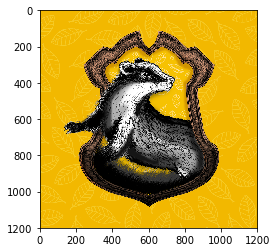

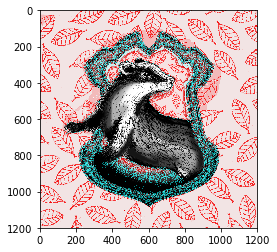

('rgb', torch.Size([3, 1200, 1200]))
('sat/2', torch.Size([3, 1200, 1200]))


In [36]:
# 1)
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import colorsys

from io import BytesIO
import IPython.display

%matplotlib inline

def show_grayscale_image(tensor):
    # IPython.display can only show images from a file.
    # So we mock up an in-memory file to show it.
    # IPython.display needs a numpy array with channels first.
    # and it also has to be uint8 with values between 0 and 255.  
    f = BytesIO()
    a = np.uint8(tensor.mul(255).numpy())
    Image.fromarray(a).save(f, 'png')
    IPython.display.display(IPython.display.Image(data = f.getvalue()))

# Plot the image here using matplotlib.
def plot_image(tensor):
    plt.figure()
    # imshow needs a numpy array with the channel dimension
    # as the the last dimension so we have to transpose things.
    plt.imshow(tensor.numpy().transpose(1, 2, 0))
    plt.show()

# Image from: https://www.pottermore.com/collection/all-about-hufflepuff
# Func to shorten the code written to turn into a tensor
pil2tensor = transforms.ToTensor()
tensor2pil = transforms.ToPILImage()

# Pull the image
pil_hp_image = Image.open('hufflepuff.jpg')
rgb_hp_image = pil2tensor(pil_hp_image)
# Convert to HSV
hsv_hp_image = pil2tensor(pil_hp_image.convert('HSV'))

# Now reduce the saturation by half
hsv_hp_image[1].mul_(.5)

#def funcConvertToRGB(channel, x, y)

#listCoordinates = [[x,y] for x in range(hsv_hp_image.size()[1]) for y in range(hsv_hp_image.size()[2])]
rgbColors = [colorsys.hsv_to_rgb(hsv_hp_image[0][x][y],hsv_hp_image[1][x][y],hsv_hp_image[2][x][y]) for x in range(hsv_hp_image.size()[1]) for y in range(hsv_hp_image.size()[2])]
#[ = i[z] for i in rgbColors for x in range(hsv_hp_image.size()[1]) for y in range(hsv_hp_image.size()[2]) for channel in [0,1,2]]
#rgb_image_sat_new = rgb_image.clone()
#for i in range(0,256):
#    for j in range(0,256):
#        rgb_new=colorsys.hsv_to_rgb(hsv_image_sat_new[0][i][j],hsv_image_sat_new[1][i][j],hsv_image_sat_new[2][i][j])
#        rgb_image_sat_new[0][i][j]=rgb_new[0]
#        rgb_image_sat_new[1][i][j]=rgb_new[1]
#        rgb_image_sat_new[2][i][j]=rgb_new[2]

# Plot the hufflepuff badges
plot_image(rgb_hp_image)
plot_image(rgb_hp_image_mod)
print('rgb', rgb_hp_image.size())
print('sat/2', rgb_hp_image_mod.size())

In [42]:
print(str(rgbColors[:][1:6][1:6]) + "\n")
r = [i[0] for i in rgbColors]
g = [i[1] for i in rgbColors]
b = [i[2] for i in rgbColors]

print(str(len(rgb_hp_image)))
print(str(leng()))
map(list,array(zip(r,g,b))
#plot_image(array(map(list,zip(r,g,b)))


[(0.9490196108818054, 0.831787797725462, 0.4745098054409027), (0.9490196108818054, 0.831787797725462, 0.4745098054409027), (0.9490196108818054, 0.831787797725462, 0.4745098054409027), (0.9490196108818054, 0.831787797725462, 0.4745098054409027)]

3


[[0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490196108818054, 0.831787797725462, 0.4745098054409027],
 [0.9490

2) In the last example where we convolved the android image with the leg patch, we saw that the dimensions of the input image decreased from 416x600 to 369x577. This is because the size of the kernel was 50x26. When we used a kernel of this size and since we used padding = 1, we get the following math along the horizontal direction (416 pixels in input + 2 pixels from padding - 49 pixels from the covolution) = 369 pixels. And in the vertical direction we get the following: 600 pixels in input + 2 pixels padding - 25 pixels from the convolution = 577.

('kernel_patch', torch.Size([3, 20, 10]))
('output1', torch.Size([1, 399, 593]))
('output2', torch.Size([1, 399, 593]))
('output3', torch.Size([1, 399, 593]))
('output', torch.Size([3, 399, 593]))
('rgb_image', torch.Size([3, 416, 600]))


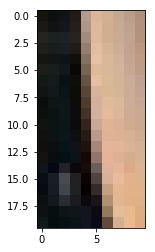

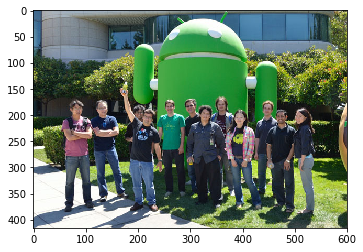

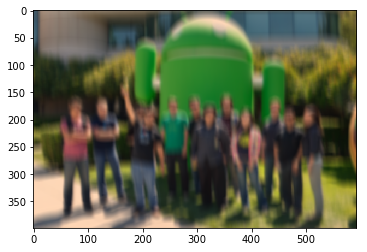

In [6]:
# 3)
# Func to shorten the code written to turn into a tensor
pil2tensor = transforms.ToTensor()

def SingleChannelConvolution(input_image, kernel):
    import torch.nn.functional as F
    from torch.autograd import Variable
    output = F.conv2d(Variable(input_image.unsqueeze(0).unsqueeze(0)), 
                      Variable(kernel.unsqueeze(0).unsqueeze(0)), padding = 1)
    return output.data.squeeze()

# Read the image from file. Assuming it is in the same directory.
pil_image = Image.open('google_android.jpg')
rgb_image = pil2tensor(pil_image)

# Crop a patch from the image itself to use as convolutional filters.
kernel_patch = rgb_image[:, 170:190, 170:180]

output1 = SingleChannelConvolution(rgb_image[0], kernel_patch[0])
output2 = SingleChannelConvolution(rgb_image[1], kernel_patch[1])
output3 = SingleChannelConvolution(rgb_image[2], kernel_patch[2])

# Remember that unsqueeze adds a dummy dimension at the beginning of the tensor.
print('kernel_patch', kernel_patch.size()) 
print('output1', output1.unsqueeze(0).size()) 
print('output2', output2.unsqueeze(0).size())
print('output3', output3.unsqueeze(0).size())

output_image = torch.cat((output1.unsqueeze(0), 
                          output2.unsqueeze(0),
                          output3.unsqueeze(0)), 0)

output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())

print('output', output_image.size())
print('rgb_image', rgb_image.size())

plot_image(kernel_patch)
plot_image(rgb_image)
plot_image(output_image)

# Here I was interested in showing the effect of convolving over the edge of a person's arm as seen in the ouput.
# This appeared primarily to just produce a blurring that made the whole image slightly darker and more flesh-colored.

('kernel_patch', torch.Size([3, 20, 20]))
('output1', torch.Size([1, 1183, 1183]))
('output2', torch.Size([1, 1183, 1183]))
('output3', torch.Size([1, 1183, 1183]))
('output', torch.Size([3, 1183, 1183]))
('rgb_image', torch.Size([3, 1200, 1200]))


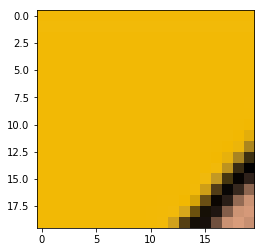

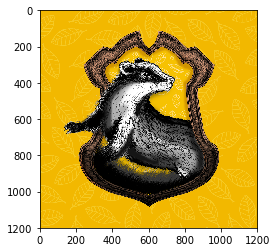

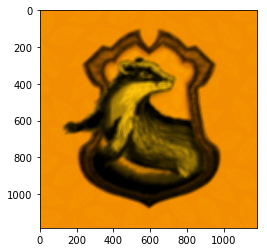

In [7]:
# 4)
from io import BytesIO
import IPython.display

# Func to shorten the code written to turn into a tensor
pil2tensor = transforms.ToTensor()

# Read the image from file. Assuming it is in the same directory.
pil_image = Image.open('hufflepuff.jpg')
rgb_image = pil2tensor(pil_image)

# Crop a patch from the image itself to use as convolutional filters.
kernel_patch = rgb_image[:, 180:200, 600:620]

output1 = SingleChannelConvolution(rgb_image[0], kernel_patch[0])
output2 = SingleChannelConvolution(rgb_image[1], kernel_patch[1])
output3 = SingleChannelConvolution(rgb_image[2], kernel_patch[2])

# Remember that unsqueeze adds a dummy dimension at the beginning of the tensor.
print('kernel_patch', kernel_patch.size()) 
print('output1', output1.unsqueeze(0).size()) 
print('output2', output2.unsqueeze(0).size())
print('output3', output3.unsqueeze(0).size())

output_image = torch.cat((output1.unsqueeze(0), 
                          output2.unsqueeze(0),
                          output3.unsqueeze(0)), 0)

output_image = (output_image - output_image.min()) / (output_image.max() - output_image.min())

print('output', output_image.size())
print('rgb_image', rgb_image.size())

plot_image(kernel_patch)
plot_image(rgb_image)
plot_image(output_image)
# Here I was interested in showing the effect of convolving over the edge of the Hufflepuff crest as seen in the ouput.
# This appeared primarily to just produce a blurring that made the whole image slightly more orange and made it much 
# harder to see the leaves in the background.